In [151]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

#Importando modelos
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [152]:
#Recolhendo dados da prata e preparando dataset

import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 6, 1)
start = dt.datetime(2019, 1, 1)

df = web.DataReader("SI", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
df = window(df,5)
df = df.rename(columns={'Close 0': 'Target'})
df.dropna(inplace=True)

#Separando dados de treino e teste
X = df.loc[:, ['Close 1','Close 2','Close 3','Close 4']]
y = df.loc[:, 'Target'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [153]:
kernel = ['rbf','linear']
C = (np.arange(10,100)/100).tolist() #0.1 - 0.99
epsilon = (np.arange(1,1000)/1000).tolist() #0.001 - 0.999

spaceSVR = {'kernel': kernel, 'C':C, 'epsilon':epsilon}

n_n = (np.arange(5,20)).tolist() #de 5 até 20
weights = ['uniform','distance']
p = [1,2]

spaceKNN = {'n_neighbors':n_n, 'weights':weights, 'p':p }

min_s_split = (np.arange(2,21)).tolist() #1 - 20
max_feat = (np.arange(50,100)/100).tolist() #0.5 - 0.99
max_depth = (np.arange(10,100)).tolist() #10 - 100
min_s_leaf = (np.arange(5,21)/100).tolist() #0.05 - 0.2
criterion = ['mse','friedman_mse','mae']
spliter = ['best']

spaceDT = {'min_samples_split':min_s_split, 'max_features':max_feat, 'max_depth':max_depth, 
        'criterion':criterion, 'splitter':spliter, 'min_samples_leaf': min_s_leaf}

n_est = (np.arange(50,751)).tolist() #50 - 750
min_s_split = (np.arange(2,21)).tolist() #1 - 20
max_feat = (np.arange(2,10)/10).tolist() #0.2 - 0.9
criterion = ['mse','mae']
max_dpt = (np.arange(10,100)).tolist() #10 - 100
min_s_leaf = (np.arange(5,21)/100).tolist() #0.05 - 0.2
max_samp = (np.arange(50,100)/100).tolist() #0.5 - 0.99
oob = [True,False]

spaceRF= {'n_estimators' : n_est, 
         'criterion' : criterion, 
         'max_depth' : max_dpt, 
         'min_samples_split' : min_s_split,
         'min_samples_leaf' : min_s_leaf, 
         'max_samples' : max_samp,
         'max_features' :  max_feat, 
         'oob_score' : oob
        }

n_est = (np.arange(50,751)).tolist() #50 - 750
lr = (np.arange(1,1000)/1000).tolist() #0.001 - 0.999
loss = ['linear','exponential','square']

spaceADB = {'n_estimators':n_est, 'learning_rate': lr, 'loss':loss}

n_est = (np.arange(50,751)).tolist() #50 - 750
min_s_split = (np.arange(2,21)).tolist() #1 - 20
sub = (np.arange(5,10)/10).tolist() #0.5 - 0.9
lr = (np.arange(5,1000)/1000).tolist() # 0.005 - 0.999
criterion = ['mse','friedman_mse','mae']
min_s_leaf = (np.arange(5,21)/100).tolist() #0.05 - 0.2
max_feat = (np.arange(2,10)/10).tolist() #0.2 - 0.9
max_dpt = (np.arange(10,100)).tolist() #10 - 100
alpha = (np.arange(50,100)/100).tolist() #0.5 - 0.99

spaceGDB = {'n_estimators':n_est, 'learning_rate':lr, 'min_samples_split': min_s_split, 
    'criterion': criterion, 'min_samples_leaf': min_s_leaf, 'max_depth':max_dpt, 'subsample':sub, 'max_features': max_feat, 
    'loss': ['ls', 'lad','huber', 'quantile'], 'alpha': alpha}

n_est = (np.arange(50,751)).tolist() #50 - 750
lr = (np.arange(1,100)/100).tolist() # 0.01 - 0.99
bst = ['gbtree','gblinear','dart']

spaceXGB = {'n_estimators':n_est, 'learning_rate':lr,'booster':bst}

In [154]:
class genetic:
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        print("Created")
        
    #Definindo população inicial
    def set_pop(self):
        
        individuos = []
    
        for p in range(self.pop):
            cromossomo = []
            for gene in self.space:
                cromossomo.append(random.choice(gene))

            individuos.append(cromossomo)

        return individuos
    
    #Definindo tipos
    def types_genes(self):
        #Armazenando tipos
        self.types = [type(g[0]) for g in self.space]
        
    #Definindo objetivo
    def obj(self, cr):
        return 0
        
    
    #Ordenar pontos e cromossomos
    def ordena (self, pontos, cromo):
        zipped = zip(pontos, cromo)

        ordenados = sorted(zipped)

        pontos_ord = []
        cromo_ord = []
        for p, c in ordenados:

            pontos_ord.append(p)
            cromo_ord.append(c)

        return pontos_ord, cromo_ord
    
    #Mutações
    def mutacao(self, gf, gene):
        #gerando taxa de mutação utilizando gaussiana de desvio 0.1
        rate = np.random.normal(1, 0.1)
        
        if self.types[gene] is type(0): #int
            gf = int(gf * rate)
            if gf > self.max_val[self.dict_[gene]]:
                gf = self.max_val[self.dict_[gene]]
                
            elif gf < self.min_val[self.dict_[gene]]:
                gf = self.min_val[self.dict_[gene]]

        elif self.types[gene] is type(0.0): #float
            gf = round(gf * rate, 3)
            if gf > self.max_val[self.dict_[gene]]:
                gf = self.max_val[self.dict_[gene]]
                
            elif gf < self.min_val[self.dict_[gene]]:
                gf = self.min_val[self.dict_[gene]]

        elif self.types[gene] is type('0'): #string
            gf = gf

        return gf
    
    #Fazendo cruzamentos
    def crossover(self, cromo_, pesos):
        nova_geracao = []
        for c in range (self.pop):
            pai = random.choices(cromo_, weights=pesos)[0]
            id_pai = cromo_.index(pai)

            #Se houver mais de 1 cromossomo para a reprodução os pais devem ser diferentes
            if len(cromo_) > 1:
                cromo_.pop(id_pai)
                pesos.pop(id_pai)

            mae = random.choices(cromo_, weights=pesos)[0]

            filho = []
            for gene in range(len(pai)):
                gp = pai[gene]
                gm = mae[gene]
                gf = random.choice([gp, gm])
                
                #Adicionando mutação
                gf = self.mutacao(gf, gene)

                filho.append(gf)

            nova_geracao.append(filho)

        return nova_geracao
    
    #Função de parada - Se a maior pontuação e o melhor cromossomo não alterararem por 5 gerações seguidas
    def stop(self, cromos, pontos):
        
        equal = 0
        
        if len(self.top_cromos) < 5:
            self.top_pontos.append(pontos[-1])
            self.top_cromos.append(cromos[-1])
            
        else:
            #verificar se o maior ponto é maior que o top
            if pontos[-1] > min(self.top_pontos):
                #apagar a menor pontuação
                minimo = min(self.top_pontos)
                min_id = self.top_pontos.index(minimo)
                self.top_pontos.pop(min_id)
                self.top_cromos.pop(min_id)
                
                #adicionar cromossomo e pontuações atuais
                self.top_pontos.append(pontos[-1])
                self.top_cromos.append(cromos[-1])
            
            #Verificar se os três melhores cromossomos são iguais
            #Se forem iguais significa que não está atualizando, ou seja, pode parar
            for cr in self.top_cromos:
                if cr  == self.top_cromos [0]:
                    equal += 1
                    
        #Todos valores iguais
        if equal == 5:
            return True
        
        return False
                
        
    
    #Função da evolução
    def evolucao(self):
        self.types_genes()
        self.cromo = self.set_pop()
        self.parar = False
        for ger in range(self.geracoes):
            
            if ger == 0:
                self.pontos = self.obj(self.cromo)
                self.pontos_max = max(self.pontos)
                self.id_max = self.pontos.index(self.pontos_max)
                self.vencedor = self.cromo[self.id_max]
            
            else:
                self.cromo = self.cromo_ord
                self.pontos = self.pontos_ord
            
            #Calculando pontuação
            print("GERAÇÃO: ",ger)
            print("Cromossomos: ",self.cromo)
            print("Pontuações: ", self.pontos)

            self.final_pont_max.append(max(self.pontos))

            #Atualizando cromossomo vencedor
            if(max(self.pontos) > self.pontos_max):
                self.pontos_max = max(self.pontos)
                self.id_max = self.pontos.index(self.pontos_max)
                self.vencedor = self.cromo[self.id_max]

            #Organizar listas de acordo com a pontuação
            self.pontos_ord, self.cromo_ord = self.ordena(self.pontos, self.cromo)
                
            #Guardando 20% dos melhores para, além de serem pais, serem utilizados na nova geração
            self.master = self.cromo_ord[int(math.floor(len(self.cromo_ord)*0.8)):]

            #print(taxa)
            #self.ponto_cut, self.cromo_cut = self.limiar(self.pontos_ord, self.cromo_ord)
            self.ponto_cut, self.cromo_cut = self.pontos_ord, self.cromo_ord
            
            #Definindo pesos para os cromossomos
            self.pesos = [i/self.max_pontos for i in self.pontos_ord]

            #Crossover
            self.geracao = self.crossover(self.cromo_ord, self.pesos)

            #Adicionando melhores da geração anterior
            for m in self.master:
                self.geracao.append(m)
                
            #deletando os 20% piores
            self.pontos = self.obj(self.geracao)
            self.pontos_ord, self.cromo_ord = self.ordena(self.pontos, self.geracao)
            self.cromo_ord = self.cromo_ord[int(math.floor(len(self.cromo_ord)*0.2)):]
            self.pontos_ord = self.pontos_ord[int(math.floor(len(self.pontos_ord)*0.2)):]

            print("--------")
            ##self.parar = self.stop(self.cromo_ord, self.pontos_ord)
            self.parar = 0
            if self.parar:
                #Calculando pontuação
                print("FINAL: ")
                print("Cromossomos: ",self.cromo_ord)
                print("Pontuações: ", self.pontos_ord)

                self.final_pont_max.append(max(self.pontos_ord))

                #Atualizando cromossomo vencedor
                self.pontos_max = max(self.pontos_ord)
                self.id_max = self.pontos.index(self.pontos_max)
                self.vencedor = self.cromo_ord[self.id_max]
                break;

        print("Melhor pontuação: ", self.pontos_max)
        print("Melhor cromossomo: ", self.vencedor)
        print("Numero de gerações: ", (ger+1))
    

In [155]:
class geneticSVR(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic KNN criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:
            
            kernel = cromos[self.dict_.index("kernel")]
            C = cromos[self.dict_.index('C')]
            epsilon = cromos[self.dict_.index('epsilon')]

            modelo = SVR(kernel = kernel, C = C, epsilon = epsilon)
            
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [156]:
class geneticKNN(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic KNN criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:

            n_n = cromos[self.dict_.index("n_neighbors")]
            weights = cromos[self.dict_.index('weights')]
            p = cromos[self.dict_.index('p')]

            modelo = KNR(n_neighbors = n_n, weights = weights, p = p)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [157]:
class geneticDT(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic RF criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:

            min_s_split = cromos[self.dict_.index("min_samples_split")]
            max_feat = cromos[self.dict_.index('max_features')]
            max_depth = cromos[self.dict_.index('max_depth')]
            criterion = cromos[self.dict_.index('criterion')]
            spliter = cromos[self.dict_.index('splitter')]
            min_s_leaf = cromos[self.dict_.index('min_samples_leaf')]
            

            modelo = DecisionTreeRegressor(min_samples_split = min_s_split, max_features = max_feat,
                                          max_depth = max_depth, criterion = criterion,
                                          splitter = spliter, min_samples_leaf= min_s_leaf)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [158]:
class geneticRF(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic RF criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:

            n_est = cromos[self.dict_.index("n_estimators")]
            min_s_split = cromos[self.dict_.index('min_samples_split')]
            max_feat = cromos[self.dict_.index('max_features')]
            criterion = cromos[self.dict_.index('criterion')]
            max_dpt = cromos[self.dict_.index('max_depth')]
            min_s_leaf = cromos[self.dict_.index('min_samples_leaf')]
            max_samp = cromos[self.dict_.index('max_samples')]
            oob = cromos[self.dict_.index('oob_score')]
            

            modelo = RandomForestRegressor(n_estimators = n_est, criterion = criterion,
                                          max_depth = max_dpt, min_samples_split = min_s_split,
                                          min_samples_leaf = min_s_leaf, max_features = max_feat,
                                          oob_score = oob, max_samples = max_samp)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [164]:
class geneticADB(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic RF criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:

            n_est = cromos[self.dict_.index("n_estimators")]
            lr = cromos[self.dict_.index('learning_rate')]
            loss = cromos[self.dict_.index('loss')]            

            modelo = AdaBoostRegressor(n_estimators = n_est, learning_rate = lr,
                                          loss = loss)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [160]:
class geneticGDB(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic RF criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:

            n_est = cromos[self.dict_.index("n_estimators")]
            lr = cromos[self.dict_.index('learning_rate')]
            min_s_split = cromos[self.dict_.index('min_samples_split')]
            criterion = cromos[self.dict_.index('criterion')]
            min_s_leaf = cromos[self.dict_.index('min_samples_leaf')]
            max_dpt = cromos[self.dict_.index('max_depth')]
            sub = cromos[self.dict_.index('subsample')]
            max_feat = cromos[self.dict_.index('max_features')]
            loss = cromos[self.dict_.index('loss')]
            alpha = cromos[self.dict_.index('alpha')]
            
            modelo = GradientBoostingRegressor(n_estimators = n_est, learning_rate = lr,
                                          min_samples_split = min_s_split, criterion = criterion,
                                          min_samples_leaf = min_s_leaf, max_depth =max_dpt,
                                          subsample = sub, max_features = max_feat,
                                          loss =loss, alpha = alpha)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [167]:
class geneticXGB(genetic):
    
    def __init__(self, n_geracoes=10, populacao=10, space = {}):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        self.dict_ = list(space)
        self.space = list(space.values())
        self.types = []
        self.top_pontos = []
        self.top_cromos = []
        self.max_val = dict(zip(space.keys(),[max(space[s]) for s in space]))
        self.min_val = dict(zip(space.keys(),[min(space[s]) for s in space]))
        print("Genetic KNN criado")
    
    def obj(self, cr):
        result = []
        size = len(cr[0]) #quantidade de genes
        for cromos in cr:
            
            n_est = cromos[self.dict_.index("n_estimators")]
            lr = cromos[self.dict_.index('learning_rate')]
            bst = cromos[self.dict_.index('booster')]

            modelo = XGBRegressor(n_estimators = n_est, learning_rate = lr, booster = bst)
            modelo.fit(X_train, y_train)
            res = modelo.score(X_test, y_test)

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result

In [168]:
g = 10
pp = 10

geneSVR = geneticSVR(n_geracoes = g, populacao = pp, space = spaceSVR)
geneKNN = geneticKNN(n_geracoes = g, populacao = pp, space = spaceKNN)
geneDT = geneticDT(n_geracoes = g, populacao = pp, space = spaceDT)
geneRF = geneticRF(n_geracoes = g, populacao = pp, space = spaceRF)
geneADB = geneticADB(n_geracoes = g, populacao = pp, space = spaceADB)
geneGDB = geneticGDB(n_geracoes = g, populacao = pp, space = spaceGDB)
geneXGB = geneticXGB(n_geracoes = g, populacao = pp, space = spaceXGB)

Genetic KNN criado
Genetic KNN criado
Genetic RF criado
Genetic RF criado
Genetic RF criado
Genetic RF criado
Genetic KNN criado


In [169]:
print("--------SVR--------")
geneSVR.evolucao()
print("--------KNN--------")
geneKNN.evolucao()
print("--------DT--------")
geneDT.evolucao()
print("--------RF--------")
geneRF.evolucao()
print("--------ADB--------")
geneADB.evolucao()
print("--------GDB--------")
geneGDB.evolucao()
print("--------XGB--------")
geneXGB.evolucao()

--------SVR--------
GERAÇÃO:  0
Cromossomos:  [['rbf', 0.91, 0.988], ['rbf', 0.25, 0.467], ['rbf', 0.75, 0.818], ['rbf', 0.82, 0.108], ['rbf', 0.19, 0.634], ['rbf', 0.73, 0.694], ['rbf', 0.27, 0.189], ['linear', 0.22, 0.582], ['rbf', 0.96, 0.696], ['linear', 0.84, 0.911]]
Pontuações:  [0.88, 0.914, 0.895, 0.928, 0.881, 0.904, 0.912, 0.909, 0.91, 0.882]
--------
GERAÇÃO:  1
Cromossomos:  [['rbf', 0.197, 0.588], ['rbf', 0.756, 0.778], ['rbf', 0.222, 0.581], ['rbf', 0.65, 0.712], ['rbf', 0.248, 0.524], ['rbf', 0.8, 0.645], ['rbf', 0.233, 0.199], ['rbf', 0.25, 0.467], ['linear', 0.79, 0.194], ['rbf', 0.82, 0.108]]
Pontuações:  [0.892, 0.898, 0.899, 0.902, 0.907, 0.909, 0.912, 0.914, 0.918, 0.928]
--------
GERAÇÃO:  2
Cromossomos:  [['rbf', 0.231, 0.616], ['rbf', 0.777, 0.739], ['rbf', 0.239, 0.544], ['rbf', 0.827, 0.673], ['rbf', 0.226, 0.163], ['rbf', 0.274, 0.459], ['linear', 0.79, 0.194], ['rbf', 0.664, 0.096], ['rbf', 0.82, 0.108], ['rbf', 0.82, 0.179]]
Pontuações:  [0.895, 0.903, 0.90

--------
GERAÇÃO:  5
Cromossomos:  [[2, 0.829, 67, 'mse', 'best', 0.147], [3, 0.953, 70, 'mse', 'best', 0.157], [3, 0.99, 59, 'mse', 'best', 0.198], [2, 0.99, 69, 'mse', 'best', 0.12], [5, 0.99, 42, 'friedman_mse', 'best', 0.12], [2, 0.75, 38, 'mae', 'best', 0.14], [2, 0.932, 76, 'mae', 'best', 0.173], [5, 0.979, 64, 'mse', 'best', 0.123], [10, 0.735, 15, 'mse', 'best', 0.163], [11, 0.753, 69, 'mse', 'best', 0.179]]
Pontuações:  [0.806, 0.806, 0.806, 0.809, 0.809, 0.813, 0.813, 0.82, 0.873, 0.877]
--------
GERAÇÃO:  6
Cromossomos:  [[2, 0.677, 59, 'mse', 'best', 0.2], [11, 0.753, 69, 'mse', 'best', 0.179], [3, 0.852, 14, 'mse', 'best', 0.16], [4, 0.765, 55, 'mse', 'best', 0.143], [2, 0.946, 73, 'mae', 'best', 0.192], [2, 0.836, 40, 'mae', 'best', 0.125], [10, 0.735, 15, 'mse', 'best', 0.163], [2, 0.99, 44, 'mae', 'best', 0.154], [11, 0.829, 62, 'mse', 'best', 0.152], [2, 0.902, 63, 'mae', 'best', 0.141]]
Pontuações:  [0.803, 0.804, 0.806, 0.806, 0.811, 0.813, 0.876, 0.88, 0.88, 0.883]


--------
Melhor pontuação:  0.922
Melhor cromossomo:  [747, 'mse', 12, 9, 0.082, 0.59, 0.56, False]
Numero de gerações:  10
--------ADB--------
GERAÇÃO:  0
Cromossomos:  [[253, 0.13, 'exponential'], [684, 0.43, 'linear'], [492, 0.062, 'linear'], [391, 0.989, 'linear'], [476, 0.463, 'exponential'], [111, 0.032, 'linear'], [464, 0.045, 'exponential'], [471, 0.226, 'linear'], [364, 0.033, 'linear'], [259, 0.953, 'linear']]
Pontuações:  [0.825, 0.814, 0.813, 0.82, 0.831, 0.829, 0.821, 0.827, 0.823, 0.813]
--------
GERAÇÃO:  1
Cromossomos:  [[386, 0.968, 'linear'], [525, 0.084, 'linear'], [244, 0.902, 'linear'], [354, 0.05, 'linear'], [116, 0.232, 'linear'], [450, 0.038, 'linear'], [204, 0.035, 'linear'], [715, 0.999, 'linear'], [476, 0.463, 'exponential'], [111, 0.032, 'linear']]
Pontuações:  [0.812, 0.813, 0.817, 0.817, 0.818, 0.818, 0.826, 0.826, 0.828, 0.834]
--------
GERAÇÃO:  2
Cromossomos:  [[503, 0.436, 'linear'], [568, 0.094, 'linear'], [183, 0.072, 'linear'], [235, 0.038, 'linear'

--------
GERAÇÃO:  6
Cromossomos:  [[473, 0.514, 11, 'mae', 0.14, 46, 0.68, 0.377, 'lad', 0.657], [372, 0.032, 10, 'mae', 0.067, 88, 0.699, 0.342, 'ls', 0.853], [422, 0.685, 2, 'mse', 0.129, 45, 0.511, 0.216, 'lad', 0.704], [308, 0.528, 2, 'mse', 0.16, 17, 0.611, 0.2, 'lad', 0.621], [331, 0.545, 15, 'friedman_mse', 0.181, 10, 0.863, 0.219, 'quantile', 0.601], [320, 0.594, 2, 'mae', 0.131, 14, 0.786, 0.2, 'quantile', 0.906], [290, 0.035, 2, 'mse', 0.148, 16, 0.829, 0.222, 'quantile', 0.697], [355, 0.034, 10, 'mse', 0.139, 14, 0.9, 0.2, 'quantile', 0.719], [471, 0.034, 11, 'mae', 0.07, 87, 0.5, 0.4, 'quantile', 0.85], [469, 0.034, 17, 'mae', 0.074, 82, 0.749, 0.386, 'quantile', 0.843]]
Pontuações:  [0.874, 0.905, 0.909, 0.91, 0.915, 0.922, 0.93, 0.931, 0.934, 0.945]
--------
GERAÇÃO:  7
Cromossomos:  [[311, 0.46, 2, 'mae', 0.161, 15, 0.591, 0.212, 'lad', 0.582], [444, 0.493, 16, 'mae', 0.079, 83, 0.736, 0.357, 'quantile', 0.614], [280, 0.033, 12, 'mae', 0.127, 13, 0.778, 0.362, 'quantile

In [146]:
print(geneKNN.final_pont_max)
print('--- --- --- ---')
print(geneKNN.pontos_max)
print('--- --- --- ---')
print(geneKNN.vencedor)

[0.917, 0.918, 0.918, 0.918, 0.918, 0.918, 0.92, 0.92, 0.92, 0.92]
--- --- --- ---
0.92
--- --- --- ---
[19, 'uniform', 1]


In [170]:
scores = [
geneSVR.pontos_max,
geneKNN.pontos_max,
geneDT.pontos_max,
geneRF.pontos_max,
geneADB.pontos_max,
geneGDB.pontos_max,
geneXGB.pontos_max
]

modelos = [
    SVR(),
    KNR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]
score_def = []
for m in modelos:
    m.fit(X_train, y_train)
    score_def.append(m.score(X_test, y_test))

In [172]:
score_ = []
for i in range (len(modelos)):
    score_.append(scores[i] /score_def[i])

In [175]:
print("Scores: ", scores)
print("Scores default: ", score_def)
print("Scores Normalizados: ", score_)

Scores:  [0.93, 0.92, 0.886, 0.922, 0.838, 0.951, 0.92]
Scores default:  [0.928216671585204, 0.8923924580553092, 0.6514789531646901, 0.886083715242524, 0.8163238776318492, 0.8453207996807376, 0.878033682658801]
Scores Normalizados:  [1.0019212415262382, 1.0309365478108734, 1.3599825377260106, 1.0405337375460575, 1.026553336196698, 1.125016680482931, 1.0477957943641973]


### Plotando resultados

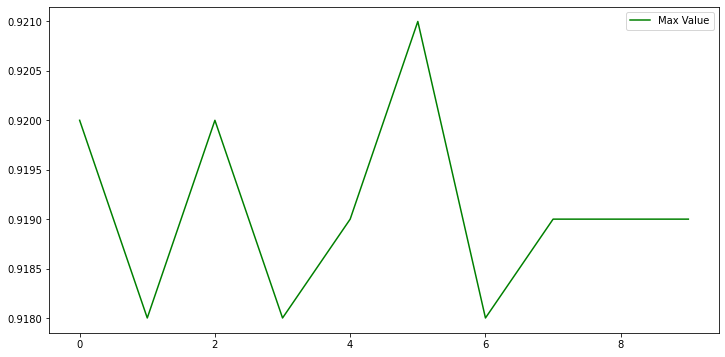

In [79]:
plt.figure(figsize = (12,6))
plt.plot(gene.final_pont_max, color = 'green', label = 'Max Value')

plt.legend()
plt.show()